In [1]:
# Difference-in-Means Testing
# Scenario 1: Uniform distributions with substantial overlap

In [2]:
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), 'scripts'))
from bet_co96 import call_process_co96
from bet_oj23 import call_process_oj23
from bet_ons import call_process_ons
from bet_ftrl_barrier import call_process_ftrl
from bet_optftrl_barrier import call_process_optftrl

from scipy.stats import truncnorm
np.random.seed(100) #reproducible

In [3]:
def sample_truncated_normal(mu, sigma, size):
    # Truncate to [0, 1]
    a, b = (0 - mu) / sigma, (1 - mu) / sigma
    return truncnorm.rvs(a, b, loc=mu, scale=sigma, size=size)

In [4]:
# Scenario 1: Uniform distributions with substantial overlap
t     = 1500
iters = 300

# **H1** scenario
y1 = np.random.uniform(0.2, 0.8, size=(iters, t)  )
y2 = np.random.uniform(0.3, 0.9, size=(iters, t)  )

# **H0** scenario
z1 = y1[:,:500]
z2 = y2[:,:500] + np.mean(y1[:,:500]) - np.mean(y2[:,:500])

In [5]:
y1 = np.array(y1)
y2 = np.array(y2)
z1 = np.array(z1)
z2 = np.array(z2)

alphas=np.linspace(0.005, 0.1, 20)
output_file='./results/unif_high_overlap.json'
call_process_ons(y1, y2, z1, z2, alphas, iters, output_file)
call_process_ftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_optftrl(y1, y2, z1, z2, alphas, iters, output_file)
call_process_co96(y1, y2, z1, z2, alphas, iters, output_file)
call_process_oj23(y1, y2, z1, z2, alphas, iters, output_file)

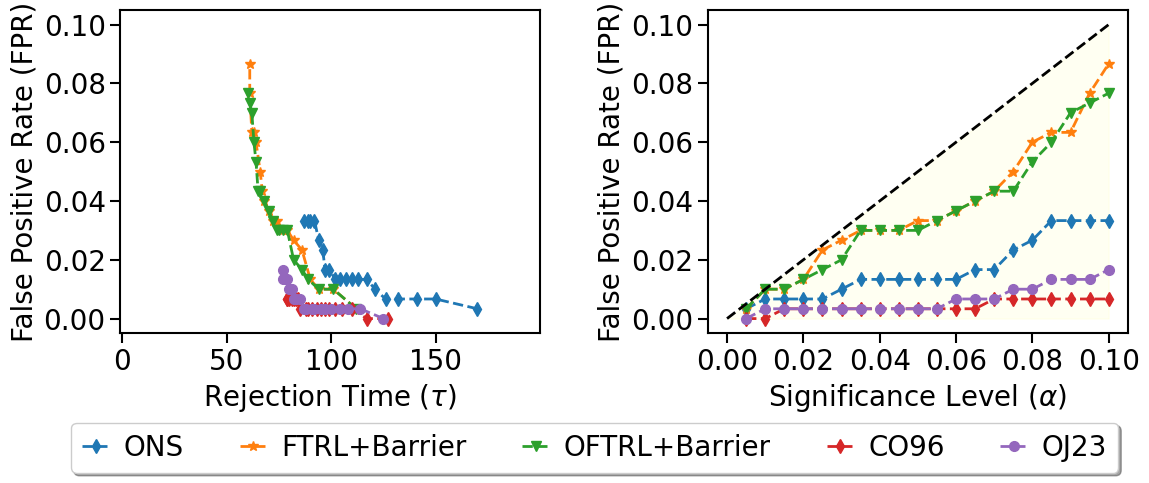

In [10]:
df_list = []

with open('./results/unif_high_overlap.json', 'r') as file:
    items = json.load(file)


for item in items:
    df = pd.DataFrame({
        'rejection_time': item['rejection_time'],
        'fpr': item['fpr'],
        'name': item['method'], 
        'alpha': np.linspace(0.005, 0.1, len(item['fpr']))  
    })
    df_list.append(df)


fig, ax = plt.subplots(1, 2, figsize=(13, 4.2))  
i = 0
markers = ["d", "*", "v", "d", "o"]

 # Medium Aquamarine, Crimson

for df in df_list:
    ax[0].plot(df['rejection_time'], df['fpr'],ls='--', lw=2,  marker=markers[i], label=df['name'].iloc[0], markersize=7)
    ax[1].plot(df['alpha'], df['fpr'], ls='--', lw=2, marker=markers[i],label=df['name'].iloc[0], markersize=7)
    i += 1

ax[0].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[0].set_ylim(-0.005,0.105)
ax[0].set_yticks(np.arange(0,0.105,0.02))
ax[0].set_xlim(-1,200)
ax[0].set_xticks(np.arange(0,200, 50))
ax[0].set_xlabel(r'Rejection Time ($\tau$)', fontsize=20)
ax[0].set_ylabel('False Positive Rate (FPR)', fontsize=20)
x = np.linspace(0, 0.1, 500)
y = x 
ax[1].fill_between(x, 0, y, color='yellow', alpha=0.05, zorder=1)  
ax[1].set_ylim(-0.005,0.105)
ax[1].set_yticks(np.arange(0,0.105,0.02))
ax[1].set_xlim(-0.005,0.105)
ax[1].set_xticks(np.arange(0,0.105,0.02))
ax[1].tick_params(axis='both', labelsize=20, which='major', length=7,  width=1.5)
ax[1].plot([0, 0.1], [0, 0.1], color='k', ls='--',  lw=2)
ax[1].set_xlabel(r'Significance Level ($\alpha$)', fontsize=20)
ax[1].set_ylabel('False Positive Rate (FPR)', fontsize=20)
handles, labels = next(ax.flat).get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.49, -0.07), fancybox=True, shadow=True,
             ncol=5, fontsize=20, labelspacing=0.1, handletextpad=0.5, handlelength=1)
plt.subplots_adjust(wspace=0.4)  
for axis in ax:  
    for spine in axis.spines.values():
        spine.set_linewidth(1.5)  

plt.savefig('./plot_results/unif_high_overlap.png', dpi=300, bbox_inches='tight')  


In [7]:
df_list

[    rejection_time       fpr name  alpha
 0            170.0  0.003333  ONS  0.005
 1            150.0  0.006667  ONS  0.010
 2            141.0  0.006667  ONS  0.015
 3            132.0  0.006667  ONS  0.020
 4            126.0  0.006667  ONS  0.025
 5            121.0  0.010000  ONS  0.030
 6            117.0  0.013333  ONS  0.035
 7            113.0  0.013333  ONS  0.040
 8            110.0  0.013333  ONS  0.045
 9            107.0  0.013333  ONS  0.050
 10           104.0  0.013333  ONS  0.055
 11           102.0  0.013333  ONS  0.060
 12            99.0  0.016667  ONS  0.065
 13            97.0  0.016667  ONS  0.070
 14            96.0  0.023333  ONS  0.075
 15            94.0  0.026667  ONS  0.080
 16            92.0  0.033333  ONS  0.085
 17            90.0  0.033333  ONS  0.090
 18            89.0  0.033333  ONS  0.095
 19            87.0  0.033333  ONS  0.100,
     rejection_time       fpr          name  alpha
 0            112.0  0.003333  FTRL+Barrier  0.005
 1            1